# Demonstration

This package relies heavily on haiku, which is a package that makes it easy to build jax-compatible modules while managing parameter access. The main idea is to create your own haiku using different modules that already exist, and to assemble them as you wish. In the following, we create a classical `tbabs*powerlaw` model as `xspec` would have done.

In [7]:
import haiku as hk
from jaxspec.model.additive import Powerlaw
from jaxspec.model.multiplicative import TbAbs

@hk.without_apply_rng
@hk.transform
def model(energy):

    pl = Powerlaw()
    tbabs = TbAbs()

    return pl(energy)*tbabs(energy)

In this code, the `model` is an `haiku.Transformed` object, which distantagle between function and parameters. It carries two methods :
* `init(PRNGkey, value)` return the initialization in term of model parameters
* `apply(params, value)` return the function evaluated at `value` with the parameters `params` (note that this doesn't require a `PRNGKey` as we stated that our function in deterministic)
Let's see how this works :

In [8]:
parameters = model.init(None, 1.)
parameters

{'powerlaw': {'alpha': DeviceArray(3.6666667, dtype=float32),
  'norm': DeviceArray(1., dtype=float32)},
 'tb_abs': {'N_H': DeviceArray(1., dtype=float32)}}

Here, we asked the structure of the parameters of our model. It was initialized using dummy default values. Next, let's use these parameters to plot our model :

[]

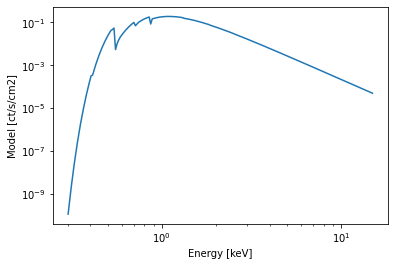

In [9]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

energy = jnp.geomspace(0.3, 15, 200)

plt.plot(energy, model.apply(parameters, energy))
plt.xlabel('Energy [keV]')
plt.ylabel('Model [ct/s/cm2]')
plt.loglog()

It seems to work pretty well!